# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Dataset Description 

## Brief Description

The dataset used in this project contains data on student performance in two core subjects (i.e. Mathematics and Portuguese) in secondary education during the 2005-2006 school year of two Portugese schools as well as possible factors that affect student achievement. The dataset features include student grades, demographic, social, and school-related attributes that were obtained using school reports and questionnaires. 

## Collection Process Description

The data was collected during the school year 2005-2006 from two public secondary schools, Gabriel Pereira and Mousinho da Silveria, from the Alentejo region of Portugal. The dataset was built from two sources: school reports from paper sheets containing a few attributes (i.e. the three period grades and number of school absences) and questionnaires used to complement the aforementioned information. 

The questionnaire was designed to have closed questions with predefined options about demographic (e.g. mother's education, family income), social/emotional (e.g. alcohol consumption), and school-related (e.g. number of past class failures) variables that may affect student performance. It is important to note that there was a grey area in the law at the time the data was collected which allowed the sale of alcoholic beverages to minors. 

The questionnaire was reviewed by school professionals and tested on a small sample of 15 students to generate feedback. The final version consisted of 37 questions in a single A4 sheet and was answered in class by 788 students. However, 111 responses were discarded due to the lack of identification details that are needed in merging with the school reports. Finally, the data was integrated into two datasets based on class: Mathematics with 395 observations and the Portuguese language with 649 observations. 

Preprocessing was performed on the data, in which some features were discarded due to the lack of discriminiative value. For example, only a few respondents stated their family income probably due to privacy concerns. The attributes that were retained in the dataset amounts to 33 attributes which will be discussed in the next portion of this notebook. 

Let us determine the number of observations of each dataset file by getting their shape before cleaning these datasets:

### Math Dataset

In [2]:
math_df = pd.read_csv('math.csv')
math_df.shape

(395, 33)

### Portuguese Dataset

In [3]:
portuguese_df = pd.read_csv('portuguese.csv')
portuguese_df.shape

(649, 33)

The Math and Portuguese datasets have a total of 395 observations and 649 observations respectively, both of which can be considered sufficiently large sample sizes (i.e. greater than or equal to 30) for the Central Limit Theorem to hold.

## Dataset File Structure

As mentioned previously, the dataset is integrated into two files, namely, Math and Portuguese. The Math dataset contains 395 observations, while the Portuguese dataset contains 649 observations. Each row in both datasets represent an individual secondary student record either from the school of Gabriel Pereira or Mousinho da Silveria. The columns, on the other hand, represent data on student performance as well as demographic, social/emotional, and school-related variables that are expected to affect student performance. To be exact, both datasets have the same 33 columns/variables. These two different dataset files will be combined in the succeeding steps. 

Let us load the two datasets to see their structures:

### Math Dataset

In [4]:
math_df = pd.read_csv('math.csv')
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Portuguese Dataset

In [5]:
portuguese_df = pd.read_csv('portuguese.csv')
portuguese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Variables Discussion

Each observation is characterized by 33 variables. The following are the descriptions of the 29 variables which correspond to the demographic, social/emotional, or school-related data of each student record in the dataset obtained using the questionnaire:

- **`school`**: student's school (binary: 'GP' - those that attend Gabriel Pereira or 'MS' - those that attend Mousinho da Silveira)
- **`sex`**: student's sex (binary: 'F' - female or 'M' - male)
- **`age`**: student's age (numeric: range from 15 to 22)
- **`address`**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **`famsize`**: family size of the student (binary: 'LE3' - less or equal to 3 family members or 'GT3' - greater than 3 family members)
- **`Pstatus`**: parents' cohabitation status (binary: 'T' - parents are living together or 'A' - parents are apart from each other)
- **`Medu`**: mother's educational attainment (numeric: 0 - no educational attainment, 1 - primary education (until 4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **`Fedu`**: father's educational attainment (numeric: 0 - no educational attainment, 1 - primary education (until 4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **`Mjob`**: mother's job (nominal: 'teacher', 'health' care related, civil services (e.g. administrative or police), at_home or other)
- **`Fjob`**: father's job (nominal: 'teacher', 'health' care related, civil services (e.g. administrative or police), at_home or other)
- **`reason`**: reason to choose this school (nominal: close to student's 'home', school 'reputation', 'course' preference or 'other')
- **`guardian`**: student's guardian (nominal: 'mother', 'father' or 'other')
- **`traveltime`**: travel time from student's home to school (numeric: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - greater than 1 hour)
- **`studytime`**: weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - greater than 10 hours)
- **`failures`**: number of past class failures (numeric: n if n is greater than or equal to one and less than 3, else 4)
- **`schoolsup`**: extra educational support (binary: yes or no)
- **`famsup`**: family educational support (binary: yes or no)
- **`paid`**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **`activities`**: extra-curricular activities (binary: yes or no)
- **`nursery`**: attended nursery school (binary: yes or no)
- **`higher`**: wants to take higher education (binary: yes or no)
- **`internet`**: Internet access at home (binary: yes or no)
- **`romantic`**: with a romantic relationship (binary: yes or no)
- **`famrel`**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **`freetime`**: free time after school (numeric: from 1 - very low to 5 - very high)
- **`goout`**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **`Dalc`**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **`Walc`**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **`health`**: current health status (numeric: from 1 - very bad to 5 - very good)

The following are the descriptions of the 4 variables which correspond to the student performance data of each observation obtained from the school reports:
- **`absences`**: number of school absences (numeric: from 0 to 93)
- **`G1`**: first period grade (numeric: from 0 to 20, 0 being the lowest and 20 being the highest)
- **`G2`**: second period grade (numeric: from 0 to 20, 0 being the lowest and 20 being the highest)
- **`G3`**: final grade (numeric: from 0 to 20, 0 being the lowest and 20 being the highest)

# Data Cleaning

Before exploring the dataset, it must first be cleaned to ensure that there are no inconsistencies that may result in erroneous data analysis. 

Specifically, the following aspects of the dataset will be checked:
- Separate Files
- Multiple representations of the same categorical value
- Incorrect datatype of a variable
- Default values of a variable
- Missing data
- Duplicate data
- Inconsistent formatting of values

## Combining Separate Files

The chosen dataset are separated into two files, one for each of the core subjects Math and Portuguese. Since it was not stated in the dataset description that student records in the Math dataset correspond to student records in the Portuguese dataset and since the student records do not have a unique identifier, the two files cannot be merged. 

Instead, the researchers decided to (1) add a new column `subject` to indicate which core subject the student record's absences and grades (i.e. G1, G2, and G3) pertain to and to (2) concatenate the two files by row. In this way, each observation is treated as a unique individual student record. 

In [6]:
new_math_df = math_df.assign(subject='math')

new_portuguese_df = portuguese_df.assign(subject='portuguese')

student_df = pd.concat([new_math_df, new_portuguese_df], ignore_index='true')
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


## Checking for Multiple Representations

The `unique` function is used to check if there exists multiple representations of values per attribute in the dataset.  

In [7]:
for column in student_df:
    print("'{}' unique values:\n".format(column), student_df[column].unique())
    print("")

'school' unique values:
 ['GP' 'MS']

'sex' unique values:
 ['F' 'M']

'age' unique values:
 [18 17 15 16 19 22 20 21]

'address' unique values:
 ['U' 'R']

'famsize' unique values:
 ['GT3' 'LE3']

'Pstatus' unique values:
 ['A' 'T']

'Medu' unique values:
 [4 1 3 2 0]

'Fedu' unique values:
 [4 1 2 3 0]

'Mjob' unique values:
 ['at_home' 'health' 'other' 'services' 'teacher']

'Fjob' unique values:
 ['teacher' 'other' 'services' 'health' 'at_home']

'reason' unique values:
 ['course' 'other' 'home' 'reputation']

'guardian' unique values:
 ['mother' 'father' 'other']

'traveltime' unique values:
 [2 1 3 4]

'studytime' unique values:
 [2 3 1 4]

'failures' unique values:
 [0 3 2 1]

'schoolsup' unique values:
 ['yes' 'no']

'famsup' unique values:
 ['no' 'yes']

'paid' unique values:
 ['no' 'yes']

'activities' unique values:
 ['no' 'yes']

'nursery' unique values:
 ['yes' 'no']

'higher' unique values:
 ['yes' 'no']

'internet' unique values:
 ['no' 'yes']

'romantic' unique values:


Based on the valid values stated in the provided dataset description, the unique values for all attributes are valid and correctly and uniquely represented except for the `failures` attribute. 

It was stated in the dataset description that the `failures` attribute represents the number of past class failures and takes the value n if 1 <= n < 3. Otherwise, it should have a value of 4. However, the unique values of the `failures` attribute are [0, 1, 2, 3]. The values 0 and 3 here are ambiguous as they are not explicitly defined in the provided dataset description. 

The count of the records with the undefined values of 0 and 3 in the `failures` attribute is checked to assess whether or not these records can be dropped. 

In [8]:
student_df['failures'].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

As can be observed above, majority of the observations have a value of 0 and 3 for the `failures` attribute. Hence, dropping these observations is not an option as this would remove 85.34% of the observations. 

Another option would be to retain the values or to map them to 4, which was the original stated value should the answer be outside of the 1 <= n < 3 range. Given the context of the data where majority of the observations have the value 0, it is highly probable that the value 0 means that the student has no past failures yet because it less likely for this many students to fail at least 3 classes. Therefore, the researchers decided to treat the value 0 as no past class failures. Correspondingly, since n is used to denote the number of failed classes in this case, the value 3 will be interpreted as having 3 past class failures, and the value 4 as having greater than 3 past class failures. 

## Checking for Incorrect Datatypes

The `info` function is used to verify if the datatype for each column in the dataset is correct. 

In [9]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Based on the valid values stated in the provided dataset description for each attribute, the datatype of all attributes is correct where strings are of the object datatype and integers are of the int64 datatype. 

## Checking for Default Values

The `unique` function is used to identify if there exist default values that do not belong to the valid values stated in the provided dataset description.

In [10]:
for column in student_df:
    print("'{}' unique values:\n".format(column), student_df[column].unique())
    print("")

'school' unique values:
 ['GP' 'MS']

'sex' unique values:
 ['F' 'M']

'age' unique values:
 [18 17 15 16 19 22 20 21]

'address' unique values:
 ['U' 'R']

'famsize' unique values:
 ['GT3' 'LE3']

'Pstatus' unique values:
 ['A' 'T']

'Medu' unique values:
 [4 1 3 2 0]

'Fedu' unique values:
 [4 1 2 3 0]

'Mjob' unique values:
 ['at_home' 'health' 'other' 'services' 'teacher']

'Fjob' unique values:
 ['teacher' 'other' 'services' 'health' 'at_home']

'reason' unique values:
 ['course' 'other' 'home' 'reputation']

'guardian' unique values:
 ['mother' 'father' 'other']

'traveltime' unique values:
 [2 1 3 4]

'studytime' unique values:
 [2 3 1 4]

'failures' unique values:
 [0 3 2 1]

'schoolsup' unique values:
 ['yes' 'no']

'famsup' unique values:
 ['no' 'yes']

'paid' unique values:
 ['no' 'yes']

'activities' unique values:
 ['no' 'yes']

'nursery' unique values:
 ['yes' 'no']

'higher' unique values:
 ['yes' 'no']

'internet' unique values:
 ['no' 'yes']

'romantic' unique values:


The unique values for all attributes belong to the valid values stated in the provided dataset description, except for the `failures` attribute. However, the researchers decided not to modify the values in this attribute due to reasons stated previously (refer to Checking for Multiple Representations section).

## Checking for Missing Data

The `isnull` function is used to check if there are any missing data in the dataset.

In [11]:
student_df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
subject       False
dtype: bool

A false value was returned for all of 34 attributes of the dataset, indicating that there are no NaN or None values in the entire dataset. Hence, no handling of missing data is needed. 

## Checking for Duplicate Data

Checking for duplicate data in this project is not appropriate as there is no unique identifier that can prove if a data is really a duplicate of another data or just another data coincidentally with the same exact values as another student record. There is no certainty that it is impossible for more than one student to have the same student performance and demographic, social/emotional, and school-related attributes. 

However, the researchers still decided to try using the `drop_duplicates` function to check if there exists similar data in the dataset for technicality. 

In [12]:
student_df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


The returned dataframe after running the `drop_duplicates` function on student_df still has 1044 rows which is equal to the number of rows of the original student_df. Hence, there is no duplicate data existing in the dataset, meaning, no data has been dropped or removed from the dataset.

## Checking for Inconsistent Formatting 

The `unique` function is used to check if there exists values in the dataset with inconsistent formats. 

In [13]:
for column in student_df:
    print("'{}' unique values:\n".format(column), student_df[column].unique())
    print("")

'school' unique values:
 ['GP' 'MS']

'sex' unique values:
 ['F' 'M']

'age' unique values:
 [18 17 15 16 19 22 20 21]

'address' unique values:
 ['U' 'R']

'famsize' unique values:
 ['GT3' 'LE3']

'Pstatus' unique values:
 ['A' 'T']

'Medu' unique values:
 [4 1 3 2 0]

'Fedu' unique values:
 [4 1 2 3 0]

'Mjob' unique values:
 ['at_home' 'health' 'other' 'services' 'teacher']

'Fjob' unique values:
 ['teacher' 'other' 'services' 'health' 'at_home']

'reason' unique values:
 ['course' 'other' 'home' 'reputation']

'guardian' unique values:
 ['mother' 'father' 'other']

'traveltime' unique values:
 [2 1 3 4]

'studytime' unique values:
 [2 3 1 4]

'failures' unique values:
 [0 3 2 1]

'schoolsup' unique values:
 ['yes' 'no']

'famsup' unique values:
 ['no' 'yes']

'paid' unique values:
 ['no' 'yes']

'activities' unique values:
 ['no' 'yes']

'nursery' unique values:
 ['yes' 'no']

'higher' unique values:
 ['yes' 'no']

'internet' unique values:
 ['no' 'yes']

'romantic' unique values:


The unique values in all of the attributes of the dataset are correctly formatted as they adhere to the valid values specified in the provided dataset description. 

# Exploratory Data Analysis

The attributes of the dataset can be generally classified into 4: student performance (e.g. grades, number of absences), demographics (e.g. student’s
age, parent’s job and education), social/emotional attributes (e.g. going out with friends, alcohol consumption), and school related attributes (e.g. reason to choose school, extra school support or travel time).

The researchers decided to focus on the `famrel`, `Dalc`, `Walc`, `absences`, and `G3` attributes in order to answer the following EDA questions:

1. What quality of family relationships has the highest average alcohol consumption?
2. What is the distribution of the students' absences across different qualities of family relationships?
3. Is there a relationship between absences and grades?

## Data Visualization and Findings

### EDA Question 1
The first question that explores the variables offered by the dataset is: ***What quality of family relationships has the highest average alcohol consumption?***

This exploration aims to determine whether a student's home and family environment may affect their alcohol consumptions on particular days. The variables then used for this comparison are `famrel`, `Dalc`, and `Walc`. `Dalc` and `Walc` are both variables pertaining to alcohol consumption, but each represents a set range of days—the former refers to the amount of alcohol consumption during work days, while the latter refers to alcohol consumption during weekends.

#### Family Relationship and Workday Alcohol Consumption
In order to explore and establish connections between these variables, the main `student_df` dataset was first grouped by the family relationship variable, then aggregated by the workday alcohol consumption variable in order to acquire the average alcohol consumption of people under a particular group of family relationship quality.

In [14]:
dalc_mean = student_df.groupby("famrel").agg({"Dalc": ["mean"]})
dalc_mean

,Dalc
,mean
famrel,
1,1.900000
2,1.744681
3,1.473373
4,1.476562
5,1.454545


Following the grouping and aggregation, the numerical summary was generated through a dataframe. It can be observed that the quality of family relationship that contains the highest average alcohol consumption during work days is quality 1, which corresponds to a very bad family relationship. With a mean of **1.900**,  this result indicates that people surrounded in an extremely unpleasant home environment tend to consume more alcohol on the workdays, as compared to those who live in comfortable family relations.

To better illustrate and provide a clearer visual comparison, the numerical summary provided above is also translated into a bar graph or plot. This is an appropriate visual to incorporate because it shows atraightforward comparison, allowing us to find the highest value across the grouped data.

In the bar plot, it becomes clearer how quality 1 does have the highest workday alcohol consumption, followed closely by quality 2, which was shown to have a **1.745** mean.

Text(0.5, 1.0, 'Average Workday Alcohol Consumption per Family Relationship')

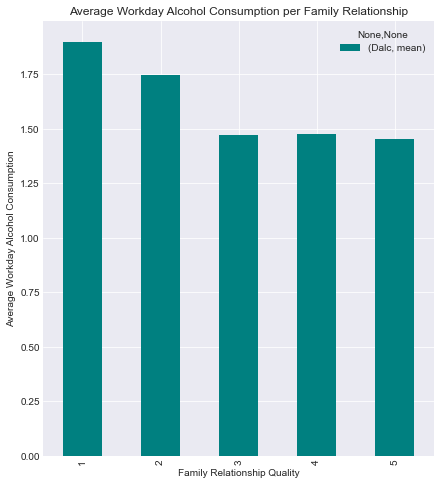

In [15]:
dalc_mean.plot.bar(figsize=(7,8), color="teal")
plt.xlabel('Family Relationship Quality')
plt.ylabel('Average Workday Alcohol Consumption')
plt.title('Average Workday Alcohol Consumption per Family Relationship')

However, the bar plot is not the only one that can be used to visualize the data explored by the first question. Another possible graph that may be used is a boxplot, which shows a distribution of the variable being measured, `Dalc`, across each family relationship quality group. Each box already presents us with a variety of meaures that we can reference, such as the median, interquartile range, minimum, and maximum values.

The boxplot found below further supports the inference that quality 1 indeed is the most spread out when it comes to consuming alcohol on work days. Its five-number summary includes the following:
- Minimum: 1.0
- First Quartile: 1.0
- Median: 1.0
- Third Quartile: 2.75
- Maximum: 5.0
- Interquartile Range: 1.75

There are no outlier values for the quality 1 boxplot.

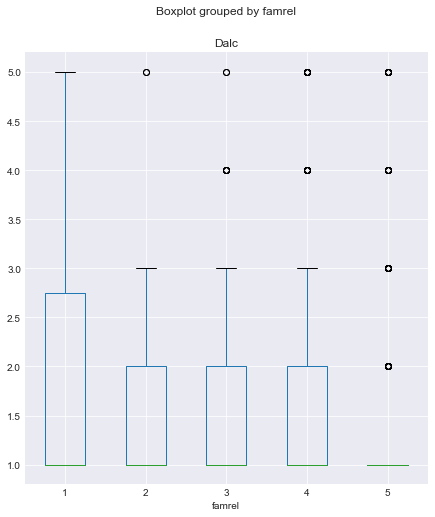

In [16]:
student_df.boxplot("Dalc", by="famrel", figsize=(7,8))
plt.show()

#### Family Relationship and Weekend Alcohol Consumption
Now that an observation has been made with regards to family relations and workday alcohol consumption, it is also necessary to consider alcohol consumption during the weekends. The procedure done above was also applied to the comparison of family relationship quality and alcohol consumption during the weekends.

The numerical summary of the average weekend alcohol consumption grouped by family relationship quality can be found below.

In [17]:
walc_mean = student_df.groupby("famrel").agg({"Walc": ["mean"]})
walc_mean

,Walc
,mean
famrel,
1,2.466667
2,2.638298
3,2.491124
4,2.253906
5,2.139860


Unlike data averages presented by alcohol consumption during the workdays, quality 2 garnered the highest average alcohol consumption for weekends, with a mean of **2.638**. As quality 2 is still indicative of a bad family relationship, this is yet another support to the notion that those who are encountering more troubles at home will opt to release their frustrations through alcohol.

The bar plot below displays the clear-cut illustration of the data presented in the numerical summary. It shows quality 2 having the highest bar representing its average alcohol consumption, succeeded by quality 1 with a close average of **2.467**.

Text(0.5, 1.0, 'Average Weekend Alcohol Consumption per Family Relationship')

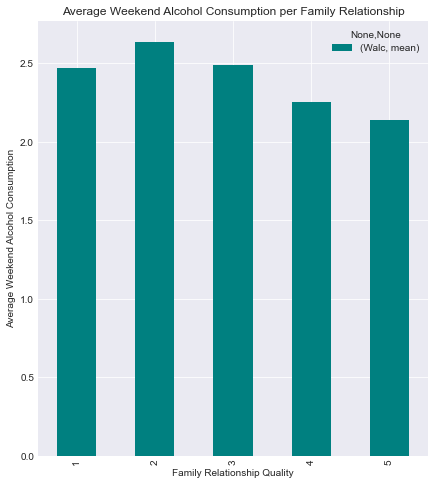

In [18]:
walc_mean.plot.bar(figsize=(7,8), color="teal")
plt.xlabel('Family Relationship Quality')
plt.ylabel('Average Weekend Alcohol Consumption')
plt.title('Average Weekend Alcohol Consumption per Family Relationship')

Lastly, another boxplot is also used to visualize the distribution of weekend alcohol consumption across different family relations. This time around, it can be observed that it is now quality 2 and quality 3 which are more spread out and encapsulates a wider range of values, instead of quality 1.

The five-number summary of the quality 2 boxplot contains the following:
- Minimum: 1.0
- First Quartile: 1.0
- Median: 3.0
- Third Quartile: 4.0
- Maximum: 5.0
- Interquartile Range: 3.00

There are no outlier values for the quality 2 boxplot.

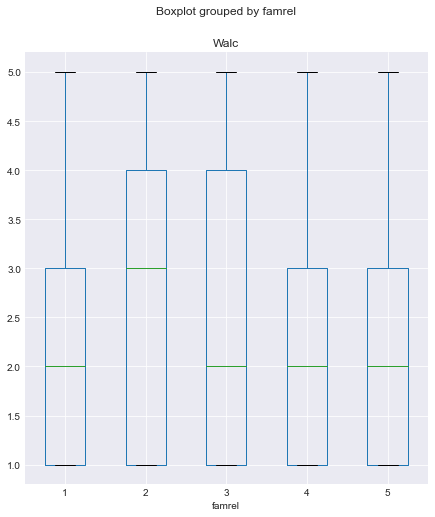

In [19]:
student_df.boxplot("Walc", by="famrel", figsize=(7,8))
plt.show()

Despite both workday and weekend alcohol comsumption data showing quite similar results, one more thing that may be noticed is that the weekend averages are a tad higher than the workday averages. This in itself also indicates a possible inference: that those who are currently not in good parent or home environments may prefer consuming alcohol on the weekends, when there are no urgent or important things to take care of for work and they have more free time to spare.

### EDA Question 2

The second question is ***"What is the distribution of the students' absences across different qualities of family relationships?"***

To answer this question, let us first examine the numerical summaries of the variables involved in this question, particularly the `absences` attribute that represents the number of school absences of a student and the `famrel` attribute which determines the quality of family relationships of a student.

#### Numerical Summaries

The following shows the mean, standard deviation, and count of absences per quality of family relationships of students in the dataset:

In [20]:
num_summaries_2 = student_df.groupby(student_df['famrel']).absences.agg(['mean', 'std', 'count'])
num_summaries_2['cv'] = num_summaries_2['std']/num_summaries_2['mean']
num_summaries_2

,mean,std,count,cv
famrel,,,,
1,5.466667,5.661323,30,1.035608
2,5.382979,4.589938,47,0.852676
3,4.804734,5.422921,169,1.128662
4,4.421875,6.780436,512,1.533385
5,3.975524,5.843824,286,1.469950


Based on the mean values, it can be said that students with the highest average number of absences are those with the worst quality of family relationships (i.e. famrel == 1), followed by students with the second worst quality of family relationships (i.e. famrel == 2), followed by students with the average quality of family relationships (i.e. famrel == 3), followed by students with the second most excellent quality of family relationships (i.e. famrel == 4), and lastly, students with the most excellent quality of family relationships (i.e. famrel == 5). 

The standard deviation and the mean were used to compute for the coefficient of variation (cv). The resulting values show that student data with a `famrel` value of 4 are the most dispersed data, while those with value of 2 are the least dispersed data in relation to the mean. 

Based on the count values, most of the students have a high quality of family relationships (i.e. famrel == 4). 

The following shows the Spearman's rank correlation between absences and the quality of family relationships of students:  

In [21]:
absences_famrel = student_df[['absences', 'famrel']]
absences_famrel.corr(method='spearman')

,absences,famrel
absences,1.000000,-0.097919
famrel,-0.097919,1.000000


The correlation of `absences` and `famrel` has a very weak negative correlation with a value of -0.097919, which means that as one of the variable increases, the other one decreases. 

#### Visualization

A histogram is generated to visualize the distribution of absences per quality of family relationships of students:

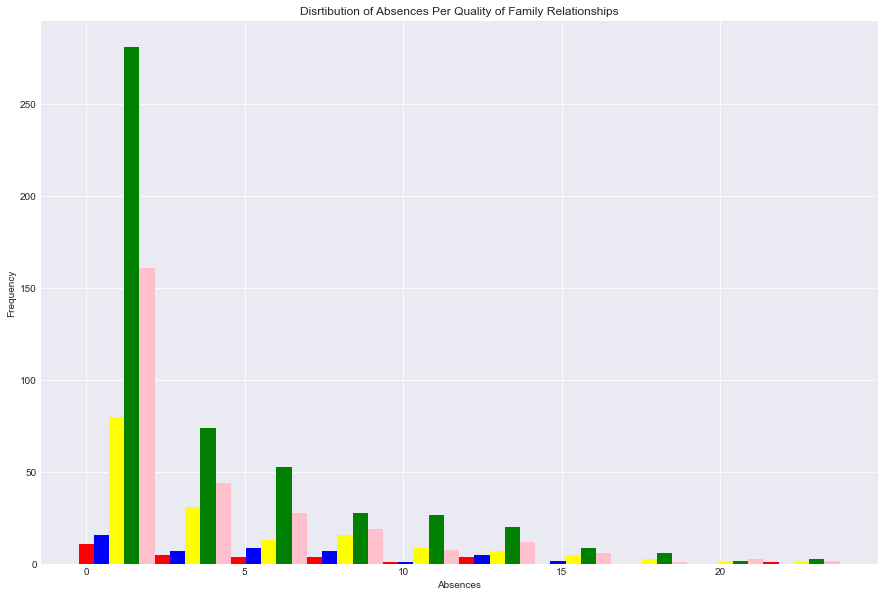

In [22]:
famrel1_df = student_df[student_df['famrel'] == 1]
famrel2_df = student_df[student_df['famrel'] == 2]
famrel3_df = student_df[student_df['famrel'] == 3]
famrel4_df = student_df[student_df['famrel'] == 4]
famrel5_df = student_df[student_df['famrel'] == 5]


fig, ax = plt.subplots(figsize=(15, 10))
one_heights, one_bins = np.histogram(famrel1_df['absences'])
two_heights, two_bins = np.histogram(famrel2_df['absences'], bins=one_bins)
three_heights, three_bins = np.histogram(famrel3_df['absences'], bins=one_bins)
four_heights, four_bins = np.histogram(famrel4_df['absences'], bins=one_bins)
five_heights, five_bins = np.histogram(famrel5_df['absences'], bins=one_bins)

width = (one_bins[1] - one_bins[0]) / 5

plt.title("Absences")
ax.bar(one_bins[:-1], one_heights, width=width, facecolor="red")
ax.bar(two_bins[:-1]+width, two_heights, width=width, facecolor="blue")
ax.bar(three_bins[:-1]+width*2, three_heights, width=width, facecolor="yellow")
ax.bar(four_bins[:-1]+width*3, four_heights, width=width, facecolor="green")
ax.bar(five_bins[:-1]+width*4, five_heights, width=width, facecolor="pink")

plt.title("Disrtibution of Absences Per Quality of Family Relationships")
plt.xlabel("Absences")
plt.ylabel("Frequency")
plt.show()

# Legend:
# Red - famrel == 1
# Blue - famrel == 2
# Yellow - famrel == 3
# Green - famrel == 4
# Pink - famrel == 5

The distribution of absences is positively skewed across all qualities of family relationships of students. This means that the distributions are asymmetrical and have outliers (i.e. high number of absences) that are relatively infrequent. This also means that the median is more resistnat to outliers than the mean. 

We can also visualize the absences per quality of family relationships using a side-by-side boxplot:

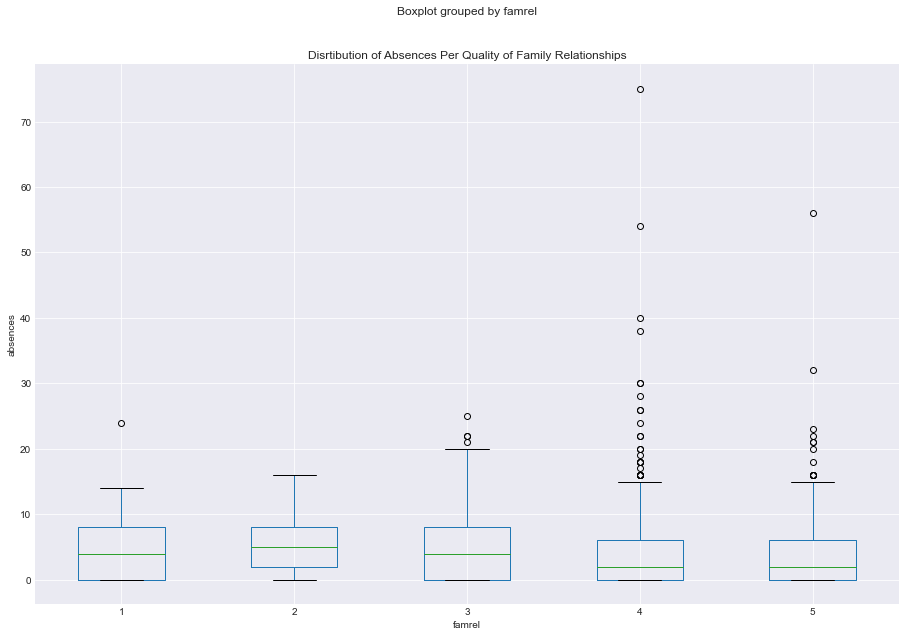

In [23]:
student_df.boxplot('absences', by='famrel', figsize=(15, 10))
plt.title("Disrtibution of Absences Per Quality of Family Relationships")
plt.xlabel("famrel")
plt.ylabel("absences")
plt.show()

The boxplot shows a summarized visualization of the aforementioned summary statistics and distribution of `absences` per quality of family relationships of students. 

### EDA Question 3
The last question that explores the variables offered by the dataset is: ***Is there a relationship between alcohol consumption, absences, and grades?***

This final exploration aims to delve into whether relationships can be identified among selected variables. For this question, the variables `Dalc`, `Walc`, `absences`, and `G3` were used. The first three variables have already been used in the previous two questions; on the other hand, `G3` refers to the variable representing a student's final grade. By trying to determine whether or not there are correlations established within these four variables, it may help gain further insight as to what and how different variables influence a student's performance in school.

As the final grade of the student will be used, there will be two correlations done—one for each of the two main subjects surveyed by the dataset: Math and Portuguese. Thus, the `subject` variable will be used for this separation.

#### Math Subject Correlation
For the process of finding correlations, a dataframe must be generated which contains information derived from the original dataset that are needed in the correlation matrix. First and foremost, only the observations with the subject value "math" will be taken, so that the correlation matrix will be distinct to the subject.

Once the math observations have been copied into a new set, the dataframe is now trimmed down by leaving only the four pertinent variables needed in the correlation.

In [24]:
math_data = student_df[student_df["subject"] == "math"]
math_data = math_data[["Dalc", "Walc", "absences", "G3"]]
math_data

,Dalc,Walc,absences,G3
0,1,1,6,6
1,1,1,4,6
2,2,3,10,10
3,1,1,2,15
4,1,2,4,10
...,...,...,...,...
390,4,5,11,9
391,3,4,3,16
392,3,3,3,7
393,3,4,0,10


Now that the new dataframe has been produced, the correlation matrix can now be generated through the Pandas dataframe function `corr()`. It makes it easier to create the Spearman's rank coefficient table using the variables selected during the dataframe creation part. Spearman's rank is the correlation method used because most of these variables involve discrete values.

In [25]:
math_data.corr(method='spearman')

,Dalc,Walc,absences,G3
Dalc,1.000000,0.639906,0.129651,-0.120944
Walc,0.639906,1.000000,0.208508,-0.104459
absences,0.129651,0.208508,1.000000,0.017731
G3,-0.120944,-0.104459,0.017731,1.000000


The correlation matrix above now shows the different correlation values between each combination of variables. There are five possible combinations that will be looked at: (1) workday alcohol consumption and absences, (2) weekend alcohol consumption and absences, (3) workday alcohol consumption and grades, (4) weekend alcohol consumption and grades, and lastly, (5) absences and grades. Though logically it may seem sensible enough to say that these variables can influence one another, correlation is still important to do because it provides additional support as to whether these variables are truly related for this particular dataset.

Upon observing the correlation matrix, the following are the correlation values for each of the combinations stipulated:
- Workday alcohol consumption and Absences: **0.130**
- Weekend alcohol consumption and Absences: **0.209**
- Workday alcohol consumption and Grades: **-0.121**
- Weekend alcohol consumption and Grades: **-0.104**
- Absences and Grades: **0.018**

Given these values, it has been determined that all of these are **very weak correlations**. This is because these values barely reached the minimum threshold needed to be considered neither as positive nor as negative correlations. This means that little to no correlations can be made within any of the given variables, which in turn means that for the Math subject, a student's performance is not influenced by alcohol consumption or absences.

However, out of the five combinations, weekend alcohol consumption and absences attained the highest correlation value; though this is still very weak, it can still be of help in providing additional direction for the further analysis of the dataset.

The following five scatterplots below serve as the visualization to aid the retrieved correlation values. From the straight vertical or horizontal shape of the line, it can also be deduced through these graphs that there is indeed very weak correlations.

Text(0.5, 1.0, 'Relationship of Workday Alcohol Consumption and Absences')

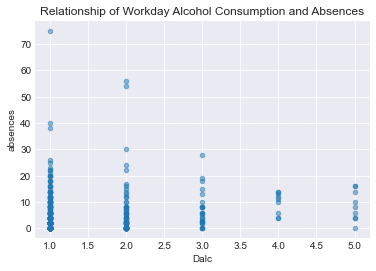

In [26]:
math_data.plot.scatter(x = 'Dalc', y = 'absences', alpha = 0.5)
plt.title("Relationship of Workday Alcohol Consumption and Absences")

Text(0.5, 1.0, 'Relationship of Weekend Alcohol Consumption and Absences')

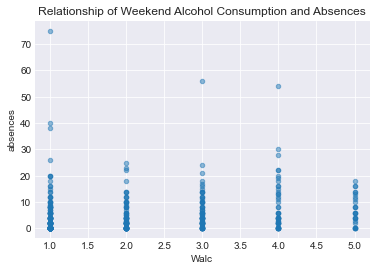

In [27]:
math_data.plot.scatter(x = 'Walc', y = 'absences', alpha = 0.5)
plt.title("Relationship of Weekend Alcohol Consumption and Absences")

Text(0.5, 1.0, 'Relationship of Workday Alcohol Consumption and Grades')

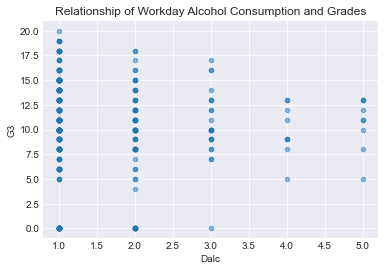

In [28]:
math_data.plot.scatter(x = 'Dalc', y = 'G3', alpha = 0.5)
plt.title("Relationship of Workday Alcohol Consumption and Grades")

Text(0.5, 1.0, 'Relationship of Weekend Alcohol Consumption and Grades')

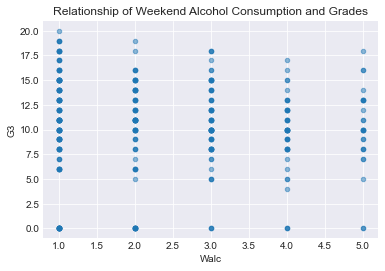

In [29]:
math_data.plot.scatter(x = 'Walc', y = 'G3', alpha = 0.5)
plt.title("Relationship of Weekend Alcohol Consumption and Grades")

Text(0.5, 1.0, 'Relationship of Absences and Grades')

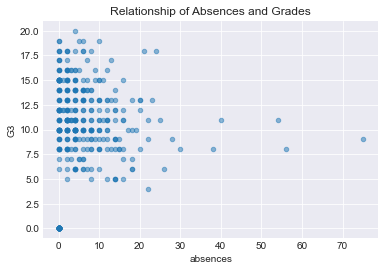

In [30]:
math_data.plot.scatter(x = 'absences', y = 'G3', alpha = 0.5)
plt.title("Relationship of Absences and Grades")

#### Portuguese Subject Correlation
The variables and processes done during the Math Subject Correlation will also be used for the Portuguese segment of correlation finding.

In [31]:
port_data = student_df[student_df["subject"] == "portuguese"]
port_data = port_data[["Dalc", "Walc", "absences", "G3"]]
port_data

,Dalc,Walc,absences,G3
395,1,1,4,11
396,1,1,2,11
397,2,3,6,12
398,1,1,0,14
399,1,2,0,13
...,...,...,...,...
1039,1,2,4,10
1040,1,1,4,16
1041,1,1,6,9
1042,3,4,6,10


In [32]:
port_data.corr(method='spearman')

,Dalc,Walc,absences,G3
Dalc,1.000000,0.613056,0.104280,-0.208394
Walc,0.613056,1.000000,0.145105,-0.170895
absences,0.104280,0.145105,1.000000,-0.158510
G3,-0.208394,-0.170895,-0.158510,1.000000


Upon observing the correlation matrix, the following are the correlation values for the five stipulated combinations:
- Workday alcohol consumption and Absences: **0.104**
- Weekend alcohol consumption and Absences: **0.145**
- Workday alcohol consumption and Grades: **-0.208**
- Weekend alcohol consumption and Grades: **-0.171**
- Absences and Grades: **-0.159**

Similar to the Math subject correlation finding, all of these are **very weak correlations**. They have not reached the minimum threshold needed to be considered neither as positive nor as negative correlations. Out of the five combinations, weekend alcohol consumption and absences also attained the highest correlation value, which is the same as the Math subject's highest attaining correlation value. This may indicate that alcohol consumption and absences may possibly reveal more relations upon further study.

The following five scatterplots below serve as the visualization to aid the retrieved correlation values. From the straight vertical or horizontal shape of the line, it can also be deduced through these graphs that there is indeed very weak correlations.

Text(0.5, 1.0, 'Relationship of Workday Alcohol Consumption and Absences')

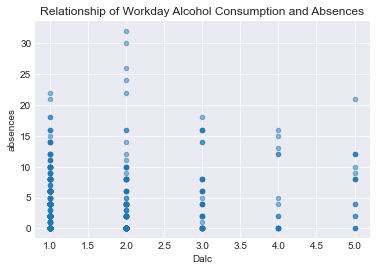

In [33]:
port_data.plot.scatter(x = 'Dalc', y = 'absences', alpha = 0.5)
plt.title("Relationship of Workday Alcohol Consumption and Absences")

Text(0.5, 1.0, 'Relationship of Weekend Alcohol Consumption and Absences')

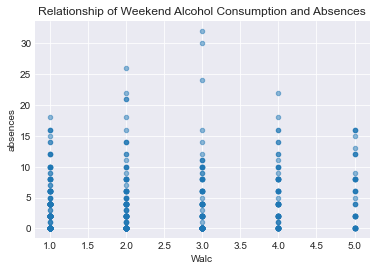

In [34]:
port_data.plot.scatter(x = 'Walc', y = 'absences', alpha = 0.5)
plt.title("Relationship of Weekend Alcohol Consumption and Absences")

Text(0.5, 1.0, 'Relationship of Workday Alcohol Consumption and Grades')

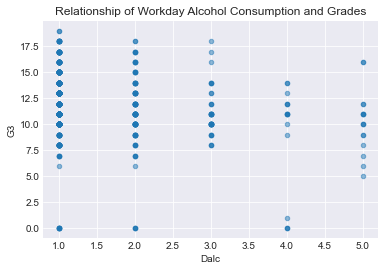

In [35]:
port_data.plot.scatter(x = 'Dalc', y = 'G3', alpha = 0.5)
plt.title("Relationship of Workday Alcohol Consumption and Grades")

Text(0.5, 1.0, 'Relationship of Weekend Alcohol Consumption and Grades')

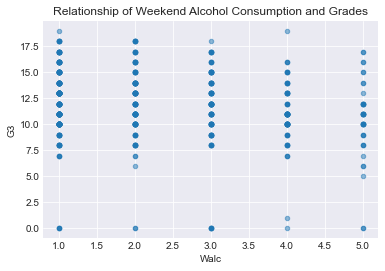

In [36]:
port_data.plot.scatter(x = 'Walc', y = 'G3', alpha = 0.5)
plt.title("Relationship of Weekend Alcohol Consumption and Grades")

Text(0.5, 1.0, 'Relationship of Absences and Grades')

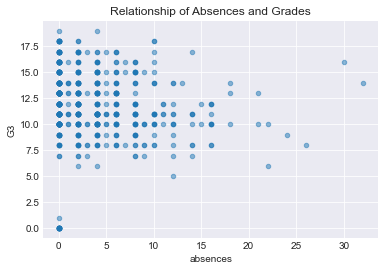

In [37]:
port_data.plot.scatter(x = 'absences', y = 'G3', alpha = 0.5)
plt.title("Relationship of Absences and Grades")

# Research Question 

In summary, the following are the generated insights from the performed exploratory data analysis in the previous section:

**EDA Q#1 Answer**: Generally, the more unpleasant a student's quality of family relationships is, the higher the alcohol consumption for both work days and weekends. 

**EDA Q#2 Answer**: The average number of absences increases as the quality of family relationships decreases, as evidenced by the very weak negative correlation between `famrel` and `absences`. It must be noted, however, that there exists outliers in the dataset that made the distrbution of absences positively skewed across all qualities of family relationships. 

**EDA Q#3 Answer**: For both Math and Portuguese core subjects, it was discovered that (1) the number of absences increases as alcohol consumption increases, as evidenced by a very weak positive correlation of absences with workdays and weekend alcohol consumption and (2) final grades decrease as alcohol consumption increases as evidenced by the very weak negative correlation of final grades with workdays and weekend alcohol consumption. The only difference between the two datasets is that, in the Math dataset, the absences has a very weak positive correlation with final grades. However, in the Portuguese dataset, the absences has a very weak negative correlation with final grades, which means that the final grades decrease as the number of absences increase. Despite having very weak correlation values, the absences and alcohol consumption attributes have the highest correlation value for both Math and Portuguese datasets, which may imply that there exists a possible insightful relationship between the two.  

Based on the observed relationships among alcohol consumption, quality of family relationships, and absences, the researchers formulated the following research question: ***Can the grades of students be classified based on their quality of family relationships, alcohol consumption, and absences?*** 

Answering this research question will generate significant findings on how to improve the grade of students, the key indicator of learning, by identifying some of the factors that possibly influence this such as alcohol consumption, quality of family relationships, and absences. In this day and age where divorce rates, underage drinking, and school absenteeism continue to rise, it is vital to determine if these actions negatively impact the academic performance of students in order to take immediate actions to alleviate this problem. These academic distractions, if not addressed, would hinder the learning progress of students, which in turn would weaken their competence, growth, and development in the real world after school. Hence, answering research questions on the factors affecting student performance are important not only to educators and policymakers, but to parents, guardians, students, and eveyone else in the community.   

# Data Modelling
To organize and visualize the data that will be used to statistically infer the answer to our research question, **Clustering** will be used as the data modelling method. This will allow us to determine distinct types of groups that represent different relations between ***family relationships, alcohol consumption, and absences***.

In [38]:
#Extract the needed data to answer the research question
data_df = student_df.loc[:, ['famrel', 'Dalc', 'Walc', 'absences']]
data_df

,famrel,Dalc,Walc,absences
0,4,1,1,6
1,5,1,1,4
2,4,2,3,10
3,3,1,1,2
4,4,1,2,4
...,...,...,...,...
1039,5,1,2,4
1040,4,1,1,4
1041,1,1,1,6
1042,2,3,4,6


In the original dataset, the alcohol consumption of students are recorded in two different variables: `Dalc` or workday alcohol consumption and `Walc` or weekend alcohol consumption. For data modelling, the alcohol consumption of students will be represented by the average of their `Dalc` and `Walc` values in order to be able to visualize the data using a 3-dimensional scatterplot which can help generate more insightful analysis and findings. 

In [39]:
data_df['alc'] = data_df[['Dalc', 'Walc']].mean(axis=1)
data_df = data_df.drop(['Dalc', 'Walc'], axis=1)
data_df

,famrel,absences,alc
0,4,6,1.0
1,5,4,1.0
2,4,10,2.5
3,3,2,1.0
4,4,4,1.5
...,...,...,...
1039,5,4,1.5
1040,4,4,1.0
1041,1,6,1.0
1042,2,6,3.5


## Preprocessing

Prior to implementing the K-Means Clustering algorithm, preprocessing must be done in order to derive the optimal value of `k` that will be used. **MinMax Scaling** is done so that the values are normalized within a range of 0 to 1. This serves as the basis to get not only the `k`, but also get a more accurate clustering.

The `MinMaxScaler` function from the sklearn.preprocessing module is used to scale the data values from 0 to 1. 

In [40]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model = scaler.fit(data_df)
scaled_data = model.transform(data_df)
scaled_data_df = pd.DataFrame(scaled_data, columns=['famrel', 'absences', 'alc'])
scaled_data_df

,famrel,absences,alc
0,0.75,0.080000,0.000
1,1.00,0.053333,0.000
2,0.75,0.133333,0.375
3,0.50,0.026667,0.000
4,0.75,0.053333,0.125
...,...,...,...
1039,1.00,0.053333,0.125
1040,0.75,0.053333,0.000
1041,0.00,0.080000,0.000
1042,0.25,0.080000,0.625


## Clustering & Interpretation

### Determining the Optimal `k` Using the Elbow Method
Now that the data has been preprocessed, the next step is to determine the optimal value of `k` to be used in the K-Means algorithm. This can be done by through the **elbow method**. 

The `KMeans` function from sklearn.cluster is used to perform the K-Means algorithm on the data. It uses the **Euclidean distance** as its default distance metric for the clustering. As for the scoring parameter to determine the optimal `k`, the inertia score is used, which is the sum of squared distance between each data point to the closest cluster center.

In [41]:
from sklearn.cluster import KMeans

inertias = []
mapping = {}
K = range(1, 11)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state = 0) #set random_state to 0 to make randomness deterministic
    kmeanModel.fit(scaled_data_df)
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_

In [42]:
#Display list of inertia scores per k value from 1 to 10 
for key, val in mapping.items():
    print(f'{key} : {val}')

1 : 128.38019016336733
2 : 81.24228357598494
3 : 53.01058957181345
4 : 43.2572743087382
5 : 35.30239441934559
6 : 29.110740795997707
7 : 25.564366886642098
8 : 22.148757842667752
9 : 19.621567977633035
10 : 17.35740931076372


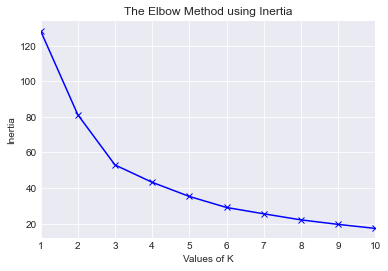

In [43]:
#Plot the inertia scores per k value from 1 to 10
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.xlim([1, 10])
plt.show()

The figure above shows the plot of the inertia score as the value of `k` increases from 1 to 10. As can be observed, the elbow in the graph is at `k` = 3 because from this point on, the inertia score only gradually decreases as the value of `k` increases. This entails that the optimal `k` to use in clustering is 3. 

### K-Means Clustering

With the optimal `k`-value now derived, the **K-Means Clustering** algorithm proper will now be executed on the data, passing the value of `3` as the number of clusters to generate to the KMeans function.

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(scaled_data_df)

The following lines of code append a new column to the `scaled_data_df` and `data_df` dataframes named clusters to indicate the cluster to which each student data is assigned to.

In [45]:
scaled_data_df['clusters'] = kmeans.labels_
data_df['clusters'] = kmeans.labels_
scaled_data_df

,famrel,absences,alc,clusters
0,0.75,0.080000,0.000,2
1,1.00,0.053333,0.000,2
2,0.75,0.133333,0.375,0
3,0.50,0.026667,0.000,1
4,0.75,0.053333,0.125,2
...,...,...,...,...
1039,1.00,0.053333,0.125,2
1040,0.75,0.053333,0.000,2
1041,0.00,0.080000,0.000,1
1042,0.25,0.080000,0.625,1


### Visualizing the Clusters Using 3D Scatterplot

A 3D scatterplot is used to visualize the three features of each student data point (i.e. famrel, alc, and absences). The data points were color-coded based on their assigned cluster to make the three generated clusters easily visible and distinguishable. 

Text(0.5, 0, 'absences')

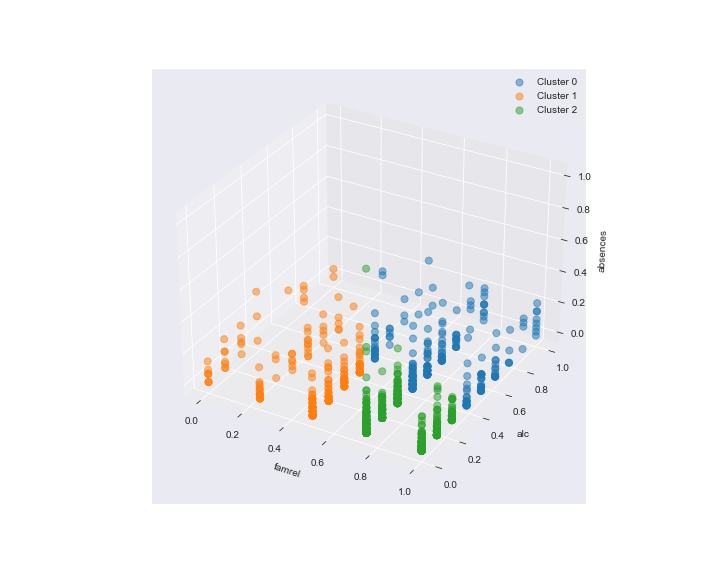

In [46]:
%matplotlib widget

plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

cluster_data_df = (scaled_data_df[scaled_data_df['clusters'] == 0])
fg = ax.scatter3D(cluster_data_df['famrel'], cluster_data_df['alc'], cluster_data_df['absences'], s=50, alpha=0.5, label="Cluster 0")
                   
cluster_data_df = (scaled_data_df[scaled_data_df['clusters'] == 1])
fg = ax.scatter3D(cluster_data_df['famrel'], cluster_data_df['alc'], cluster_data_df['absences'], s=50, alpha=0.5, label="Cluster 1")
                   
cluster_data_df = (scaled_data_df[scaled_data_df['clusters'] == 2])
fg = ax.scatter3D(cluster_data_df['famrel'], cluster_data_df['alc'], cluster_data_df['absences'], s=50, alpha=0.5, label="Cluster 2")

ax.legend(loc=1)
ax.set_xlabel("famrel")
ax.set_ylabel("alc")
ax.set_zlabel("absences")

## EDA on Clusters

Exploratory Data Analysis can be performed to characterize each cluster of the dataset. 

Particularly, the following EDA questions will be answered in the succeeding sections:

1. How many students are there in each cluster?
2. What is the distribution of the students' quality of family relationships across the different clusters?
3. What is the distribution of the students' alcohol consumption across the different clusters?
4. What is the distribution of the students' absences across the different clusters?
5. What is the distribution of the students' grades across the different clusters?

### EDA Question 1

Question: ***How many students are there in each cluster?***

The code below lists the number of students in each cluster using value_counts:

In [47]:
data_df['clusters'].value_counts()

2    581
0    253
1    210
Name: clusters, dtype: int64

From the result, it can be said that majority of the students belong to Cluster 2, followed by Cluster 0, then finally, Cluster 1.

### EDA Question 2

Question: ***What is the distribution of the students' quality of family relationships across the different clusters?***

The measures of central tendency (i.e. mean, median, mode) are generated to get an overview of the distribution of the data per cluster.

In [48]:
mode = []
for i in range(0, 3):
    mode.append(data_df[data_df['clusters'] == i]['famrel'].mode().values[0])

clustered_famrel = data_df.groupby("clusters").agg({"famrel": ["mean", "median"]})
clustered_famrel['famrel', 'mode'] = mode
clustered_famrel

famrel            
              mean median mode
clusters                      
0         4.138340    4.0    4
1         2.500000    3.0    3
2         4.366609    4.0    4

Based on the summary statistics above, it can be deduced that Cluster 0 and Cluster 2 are very similar with Cluster 2 having a slightly higher quality of family relationships compared to Cluster 0. Cluster 1 is the group with the worst or lowest quality of family relationships across three measures of central tendency. 

A boxplot is generated to get a more in-depth representation of the distribution of the `famrel` attribute across the 3 clusters:

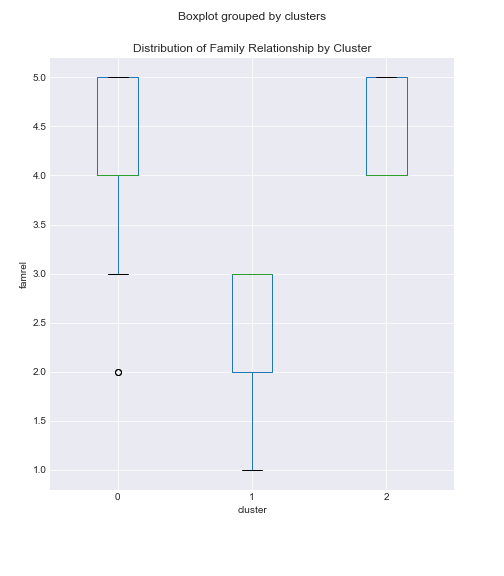

In [49]:
data_df.boxplot("famrel", by="clusters", figsize=(7,8))
plt.title("Distribution of Family Relationship by Cluster")
plt.xlabel("cluster")
plt.ylabel("famrel")
plt.show()

The boxplot above supports the earlier analysis of the most prominent family relationship levels for each cluster, with clusters 0 and 2 having high `famrel` values versus cluster 1 with the lowest `famrel` value. Based on the boxplot, Cluster 2 is very dense, with all of its data concentrated within the `famrel` value of 4 to 5.

### EDA Question 3

Question: ***What is the distribution of the students' alcohol consumption across the different clusters?***

The measures of central tendency (i.e. mean, median, mode) are generated to get an overview of the distribution of the data per cluster.

In [50]:
mode = []
for i in range(0, 3):
    mode.append(data_df[data_df['clusters'] == i]['alc'].mode().values[0])

clustered_famrel = data_df.groupby("clusters").agg({"alc": ["mean", "median"]})
clustered_famrel['alc', 'mode'] = mode
clustered_famrel

alc            
              mean median mode
clusters                      
0         3.249012    3.0  3.0
1         1.802381    1.5  1.0
2         1.328744    1.0  1.0

Based on the summary statistics above, it can be said that Cluster 0 is the group with the highest alcohol consumption. Cluster 1 and 2 have close values, but it still worth noting that Cluster 1 has a higher alcohol consumption compared to Cluster 2. 

A boxplot is generated to get a more in-depth representation of the distribution of the `alc` attribute across the 3 clusters:

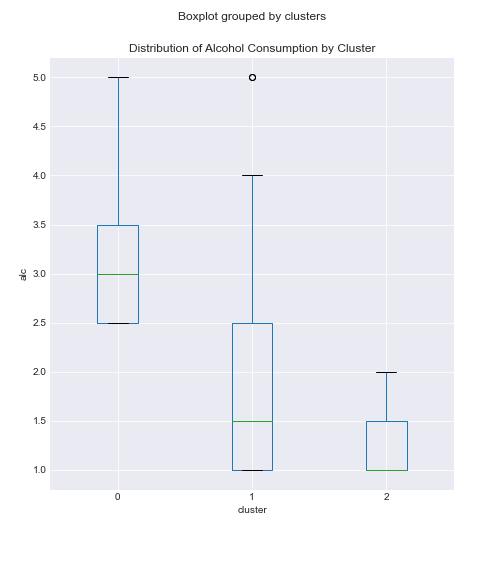

In [51]:
data_df.boxplot("alc", by="clusters", figsize=(7,8))
plt.title("Distribution of Alcohol Consumption by Cluster")
plt.xlabel("cluster")
plt.ylabel("alc")
plt.show()

The above boxplot shows that Cluster 0's students are more within the moderate consumption levels, while clusters 1 and 2 are on the lower side of consumption. This supports the earlier analysis of the most prominent alcohol consumption levels for each cluster, with Cluster 0 having the highest alcohol consumption followed by Cluster 1, and the least, Cluster 2. 


Cluster 1 has a very wide range of values, with 75% of its data falling within 1.0 to 2.5 alcohol consumption level while 25% of its data reaching as high as 4.0 alcohol consumption level. This is followed by Cluster 0 with 75% of its data falling within 2.5 to 3.5 alcohol consumption level and 25% of its data reaching the highest alcohol consumption level of 5.0. Cluster 2 is the least varied data with 75% of its values ranging from 1.0 to 1.5 alcohol consumption level and 25% of its data reaching only up to the 2.0 level. 

### EDA Question 4

Question: ***What is the distribution of the students' absences across the different clusters?***

The measures of central tendency (i.e. mean, median, mode) are generated to get an overview of the distribution of the data per cluster.

In [52]:
mode = []
for i in range(0, 3):
    mode.append(data_df[data_df['clusters'] == i]['absences'].mode().values[0])

clustered_famrel = data_df.groupby("clusters").agg({"absences": ["mean", "median"]})
clustered_famrel['absences', 'mode'] = mode
clustered_famrel

absences            
              mean median mode
clusters                      
0         5.992095    4.0    0
1         4.780952    4.0    0
2         3.631670    2.0    0

Based on the summary statistics above, it can be said that Cluster 0 has the highest number of absences, followed by Cluster 1, and the least, Cluster 2. 

A boxplot is generated to get a more in-depth representation of the distribution of the `absences` attribute across the 3 clusters:

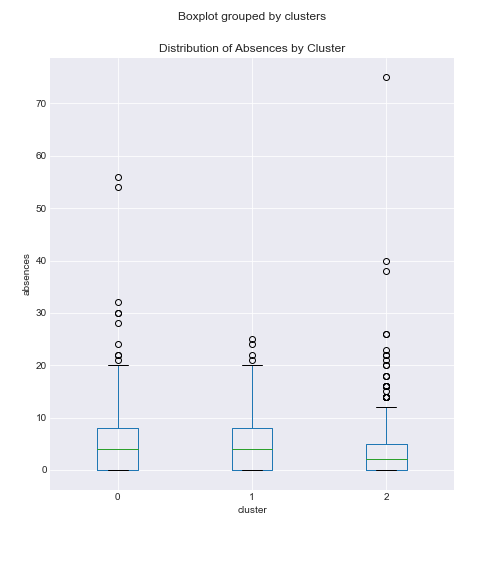

In [53]:
data_df.boxplot("absences", by="clusters", figsize=(7,8))
plt.title("Distribution of Absences by Cluster")
plt.xlabel("cluster")
plt.ylabel("absences")
plt.show()

The boxplot shows that there are outliers across the three clusters, mostly in Cluster 0 and Cluster 2. Cluster 0 and Cluster 1 have the same distribution for 75% of their data. On the other hand, Cluster 2 is on the lower side of number of absences compared with the other two clusters. It has the most number of outliers, which may be attributed to it having the largest number of student data, over twice as many as the other clusters. 

### EDA Question 5

Question: ***What is the distribution of the students' grades across the different clusters?***

The grades of students in the original dataframe are represented in three variables: G1, G2, and G3. For the purpose of this EDA, the grade of a student will be treated as the average of these three variables. 

In [54]:
data_df['grade'] = student_df[['G1', 'G2', 'G3']].mean(axis=1)
data_df

,famrel,absences,alc,clusters,grade
0,4,6,1.0,2,5.666667
1,5,4,1.0,2,5.333333
2,4,10,2.5,0,8.333333
3,3,2,1.0,1,14.666667
4,4,4,1.5,2,8.666667
...,...,...,...,...,...
1039,5,4,1.5,2,10.333333
1040,4,4,1.0,2,15.333333
1041,1,6,1.0,1,10.666667
1042,2,6,3.5,1,10.000000


The measures of central tendency (i.e. mean, median, mode) are generated to get an overview of the distribution of the data per cluster.

In [55]:
clustered_famrel = data_df.groupby("clusters").agg({"grade": ["mean", "median"]})
clustered_famrel

grade           
               mean     median
clusters                      
0         10.475626  10.333333
1         11.015873  11.166667
2         11.702811  12.000000

Based on the summary statistics above, it can be said that students from Cluster 2 has the highest grade, followed by Cluster 1, and the least, Cluster 0. 

A boxplot is generated to get a more in-depth representation of the distribution of the `alc` attribute across the 3 clusters:

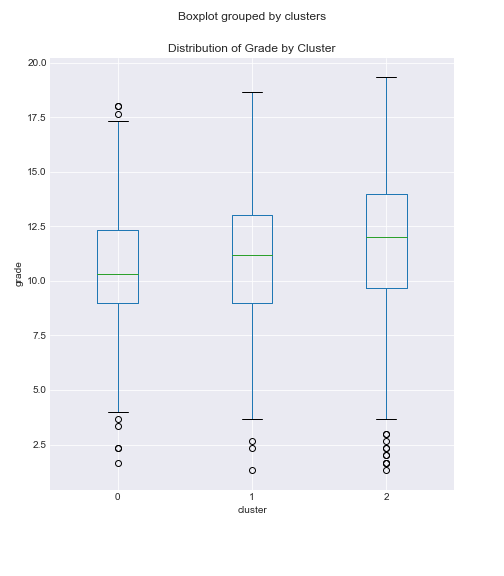

In [56]:
data_df.boxplot("grade", by="clusters", figsize=(7,8))
plt.title("Distribution of Grade by Cluster")
plt.xlabel("cluster")
plt.ylabel("grade")
plt.show()

The boxplot shows that all three clusters have a wide range of values and some outliers. However, based on the median and the interquartile range, it can be said that 
Cluster 2 generally has the highest grade compared to the two other clusters. Cluster 1, on the other hand, has generally has a higher grade compared to Cluster 0. 

### EDA Findings Synthesis

The section below shows the summary of the means generated per attribute for each cluster in the dataset. 

In [57]:
arr = [[4.14, 3.25, 6.00, 10.48], [2.50, 1.80, 4.78, 11.02], [4.37, 1.33, 3.63, 11.70]]
summary = pd.DataFrame(arr, columns=['famrel', 'alc', 'absences', 'grade'])
summary.rename(index={0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'})

,famrel,alc,absences,grade
Cluster 0,4.14,3.25,6.00,10.48
Cluster 1,2.50,1.80,4.78,11.02
Cluster 2,4.37,1.33,3.63,11.70


Based on the results of the exploratory data analysis on the clustering of student data, the following characteristics have been identified per cluster:

- **Cluster 0**: Contains students with good family relationships, moderate alcohol consumption, most frequent absences, and lowest grade compared with the other clusters
- **Cluster 1**: Contains students with the worst family relationships, low alcohol consumption, frequent absences, and median grade compared with the other clusters 
- **Cluster 2**: Contains students with the best family relationships, lowest alcohol consumption, occasional absences, and highest grade compared with the other clusters

# Statistical Inference

## Hypotheses

With the given data model and interpretations, the group has now derived a hypothesis that will be the basis of the succeeding statistical inference:

***$H_0$: The grades of students have no difference between clusters based on their quality of family relationships, alcohol consumption, and absences.***

***$H_A$: The grades of students have a difference between clusters based on their quality of family relationships, alcohol consumption, and absences.***

## Preprocessing

In [58]:
import sci_analysis as sa
import scikit_posthocs as sp
import scipy.stats as stats
import statsmodels.api as sm
plt.style.use('seaborn-bright')

In order to conduct our statistical inference, the group will now perform a little pre-processing in order to use the result from clustering with the grades of the students.

In [59]:
student_data = student_df.loc[:, ['famrel', 'absences', 'G1', 'G2', 'G3']]
student_data['alc'] = data_df['alc']
student_data['cluster'] = data_df['clusters']
student_data['G1_rank'] = student_data["G1"].rank()
student_data['G2_rank'] = student_data["G2"].rank()
student_data['G3_rank'] = student_data["G3"].rank()
student_data
student_data

,famrel,absences,G1,G2,G3,alc,cluster,G1_rank,G2_rank,G3_rank
0,4,6,5,6,6,1.0,2,11.5,50.0,72.5
1,5,4,5,5,6,1.0,2,11.5,30.5,72.5
2,4,10,7,8,10,2.5,0,85.5,133.5,307.0
3,3,2,15,14,15,1.0,1,928.0,841.0,881.5
4,4,4,6,10,10,1.5,2,34.0,356.0,307.0
...,...,...,...,...,...,...,...,...,...,...
1039,5,4,10,11,10,1.5,2,372.5,489.5,307.0
1040,4,4,15,15,16,1.0,2,928.0,915.5,948.5
1041,1,6,11,12,9,1.0,1,510.5,622.0,199.0
1042,2,6,10,10,10,3.5,1,372.5,356.0,307.0


## Hypothesis Testing

After our pre-processing, we can now perform hypothesis testing on the effect of combined factors of alcohol consumption, family relationship, and absences on grades.

In order to determine whether to reject or accept our null hypothesis, we decide to test it against a **significance level of 0.05 (alpha=0.05).**

### G1 Grade Comparison between Clusters


We first do a exploration of the effect on G1 grades.

In [60]:
G1_df = student_data.groupby("cluster").agg({"G1": ["describe"]})
G1_df

G1                                                  
        describe                                                  
           count       mean       std  min   25%   50%   75%   max
cluster                                                           
0          253.0  10.383399  2.639602  5.0   9.0  10.0  12.0  18.0
1          210.0  11.042857  3.028267  4.0   9.0  11.0  13.0  18.0
2          581.0  11.636833  3.030412  0.0  10.0  12.0  14.0  19.0

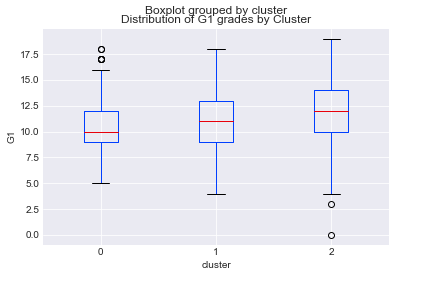

In [61]:
student_data.boxplot("G1", by="cluster")
plt.title("Distribution of G1 grades by Cluster")
plt.xlabel("cluster")
plt.ylabel("G1")
plt.show()

As shown above, there isn't any glaring difference of G1 grades between clusters. We can perform statistical analysis to check if significant difference that will show. But first let us, check if the data is normally distributed and have equal variance.

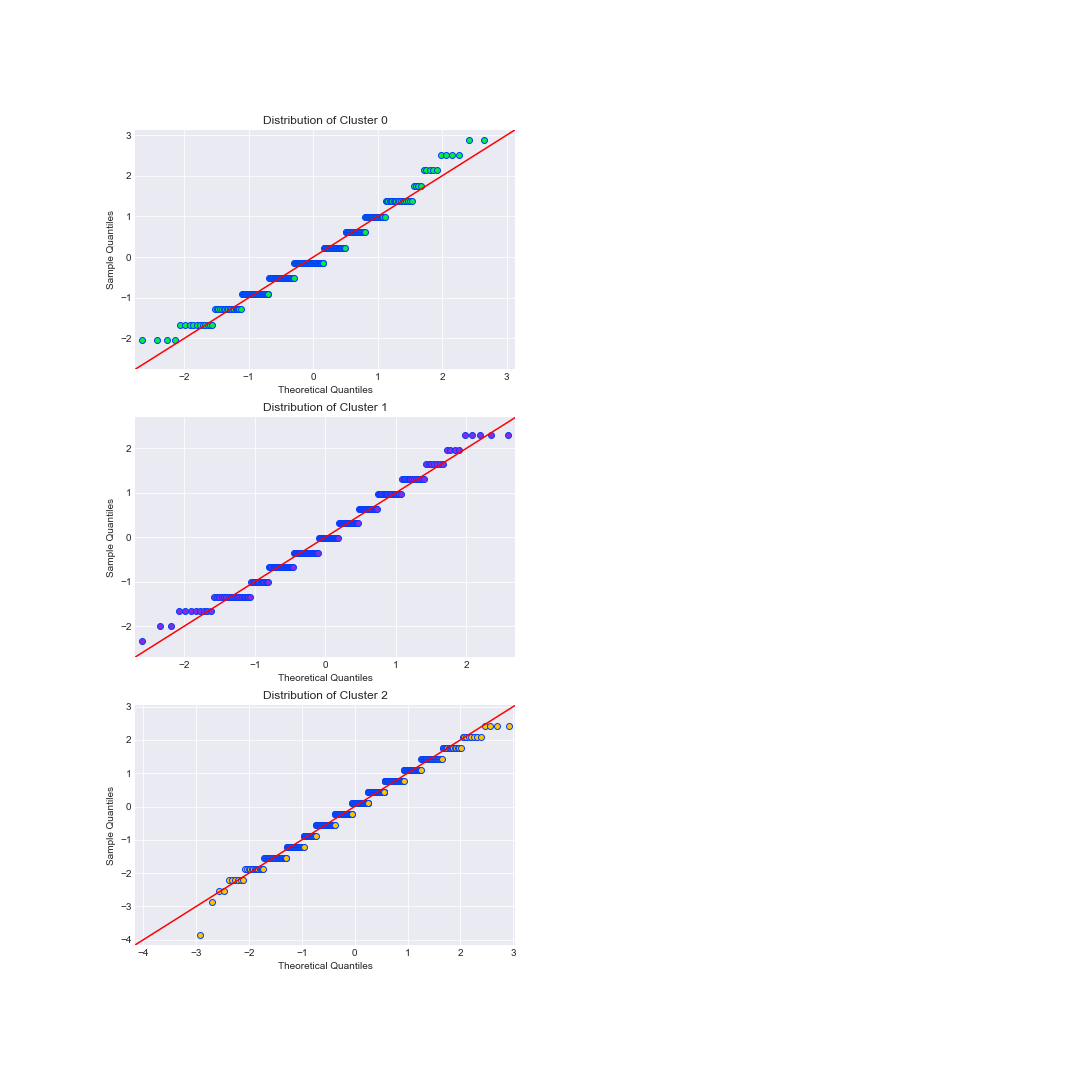

In [62]:
cluster0_qq = student_data[student_data["cluster"]==0]["G1"]
cluster1_qq = student_data[student_data["cluster"]==1]["G1"]
cluster2_qq = student_data[student_data["cluster"]==2]["G1"]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 2, 1)
sm.qqplot(cluster0_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C1')
ax.set_title('Distribution of Cluster 0')
ax = fig.add_subplot(3, 2, 3)
sm.qqplot(cluster1_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C3')
ax.set_title('Distribution of Cluster 1')
ax = fig.add_subplot(3, 2, 5)
sm.qqplot(cluster2_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C4')
ax.set_title('Distribution of Cluster 2')

plt.show()

The Q-Q plots compares the distribution of our data with the normal distribution. If the points fall approximately in the line, then the distribution might be normal. In our case, it seems that several points deviate from the line. Since that is the case, we can perform Shapiro Wilk test to ensure the normality of our data.

In [63]:
shapiro_G1 = student_data.groupby("cluster")["G1"].apply(lambda x: pd.Series(stats.shapiro(x), index=['Test Statistics','P-value']))
shapiro_G1

cluster                 
0        Test Statistics    0.973479
         P-value            0.000116
1        Test Statistics    0.979440
         P-value            0.003646
2        Test Statistics    0.986985
         P-value            0.000048
Name: G1, dtype: float64

With 95% confidence (alpha=0.05), we can reject the null hypothesis of Shapiro-Wilk test where it says the data that we have has normal distribution. Therefore, across the 3 clusters, the data is not normally distributed. Now we will do Levene's test to check for equal variance across the cluster.

In [64]:
groups = [student_data.loc[ids, 'G1'].values for ids in student_data.groupby('cluster').groups.values()]
stats.levene(*groups)

LeveneResult(statistic=4.740054003171676, pvalue=0.008927660067951792)

With 95% confidence (alpha=0.05, p-value: 0.09), we can accept the null hypothesis of Levene test where it establish the equal variance of clusters. Since we have a non-normal distribution yet have equal variance data, we can only perform a non-parametric test called Kruskal-Wallis to determine if there are significant difference of grades across the cluster.


In [65]:
stats.kruskal(*groups)

KruskalResult(statistic=36.685973470348834, pvalue=1.0807918952345025e-08)

With 95% confidence (alpha=0.05, p-value: 1.08e-08), we can reject our null hypothesis.  This means that the three attributes affect the grades of students for the first trimester. Now we will perform a post-hoc analysis to determine which pair of cluster have significant difference.

In [66]:
post_hoc_values = sp.posthoc_dunn(student_data, val_col='G1', group_col='cluster', p_adjust='holm')
post_hoc_values

,0,1,2
0,1.000000e+00,0.013801,7.347242e-09
1,1.380083e-02,1.000000,1.380083e-02
2,7.347242e-09,0.013801,1.000000e+00


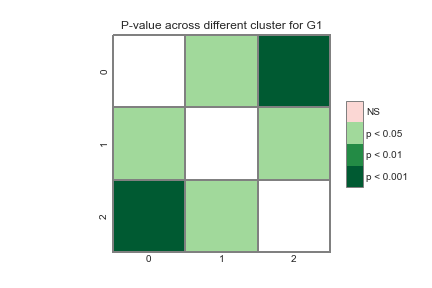

In [67]:
fig = plt.figure()
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
plt.title("P-value across different cluster for G1")
sp.sign_plot(post_hoc_values, **heatmap_args)
plt.show()

Across our post-hoc test (Dunn test), with 95% confidence (alpha=0.05), across all cluster there is a significant difference in terms of grades during the first trimester. We can look for the statistics in rank of the grades per cluster to see why is it our post-hoc test shows such a result.

In [68]:
G1_MeanRank = student_data.groupby("cluster").agg({"G1_rank": ["describe"]})
G1_MeanRank

G1_rank                                                           
        describe                                                           
           count        mean         std   min    25%    50%    75%     max
cluster                                                                    
0          253.0  433.494071  273.694863  11.5  251.5  372.5  634.0  1033.0
1          210.0  503.030952  306.086832   4.0  251.5  510.5  745.0  1033.0
2          581.0  568.295181  299.790256   1.0  372.5  634.0  848.0  1042.5

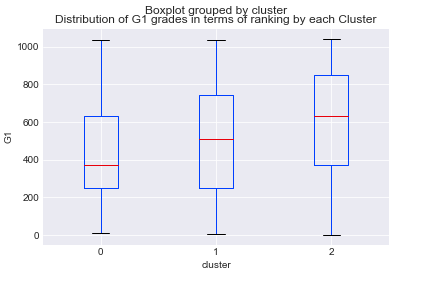

In [69]:
student_data.boxplot("G1_rank", by="cluster")
plt.title("Distribution of G1 grades in terms of ranking by each Cluster")
plt.xlabel("cluster")
plt.ylabel("G1")
plt.show()

When we look at the ranking of students (higher the rank, the better grades), we can see that cluster 3 students have the highest mean grades among the 3 cluster, followed by cluster 1, and lastly cluster 0. The difference in grades between cluster are shown to be have significant difference from one another by our statistical test (Kruskal-Walis and Dunn Test)

### G2 Grade Comparison between Clusters

We first do a exploration of the effect on G2 grades.

In [70]:
G2_df = student_data.groupby("cluster").agg({"G2": ["describe"]})
G2_df

G2                                                  
        describe                                                  
           count       mean       std  min   25%   50%   75%   max
cluster                                                           
0          253.0  10.470356  2.936516  0.0   9.0  10.0  12.0  18.0
1          210.0  11.014286  3.267176  0.0   9.0  11.0  13.0  19.0
2          581.0  11.667814  3.369459  0.0  10.0  12.0  14.0  19.0

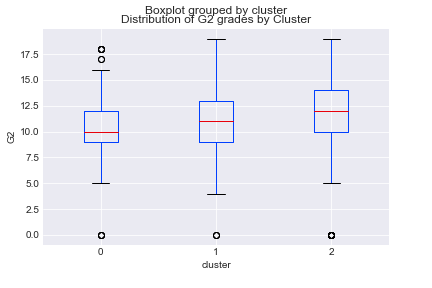

In [71]:
student_data.boxplot("G2", by="cluster")
plt.title("Distribution of G2 grades by Cluster")
plt.xlabel("cluster")
plt.ylabel("G2")
plt.show()

As shown above, there isn't any glaring difference of G2 grades between clusters. We can perform statistical analysis to check if significant difference that will show. But first let us, check if the data is normally distributed and have equal variance.

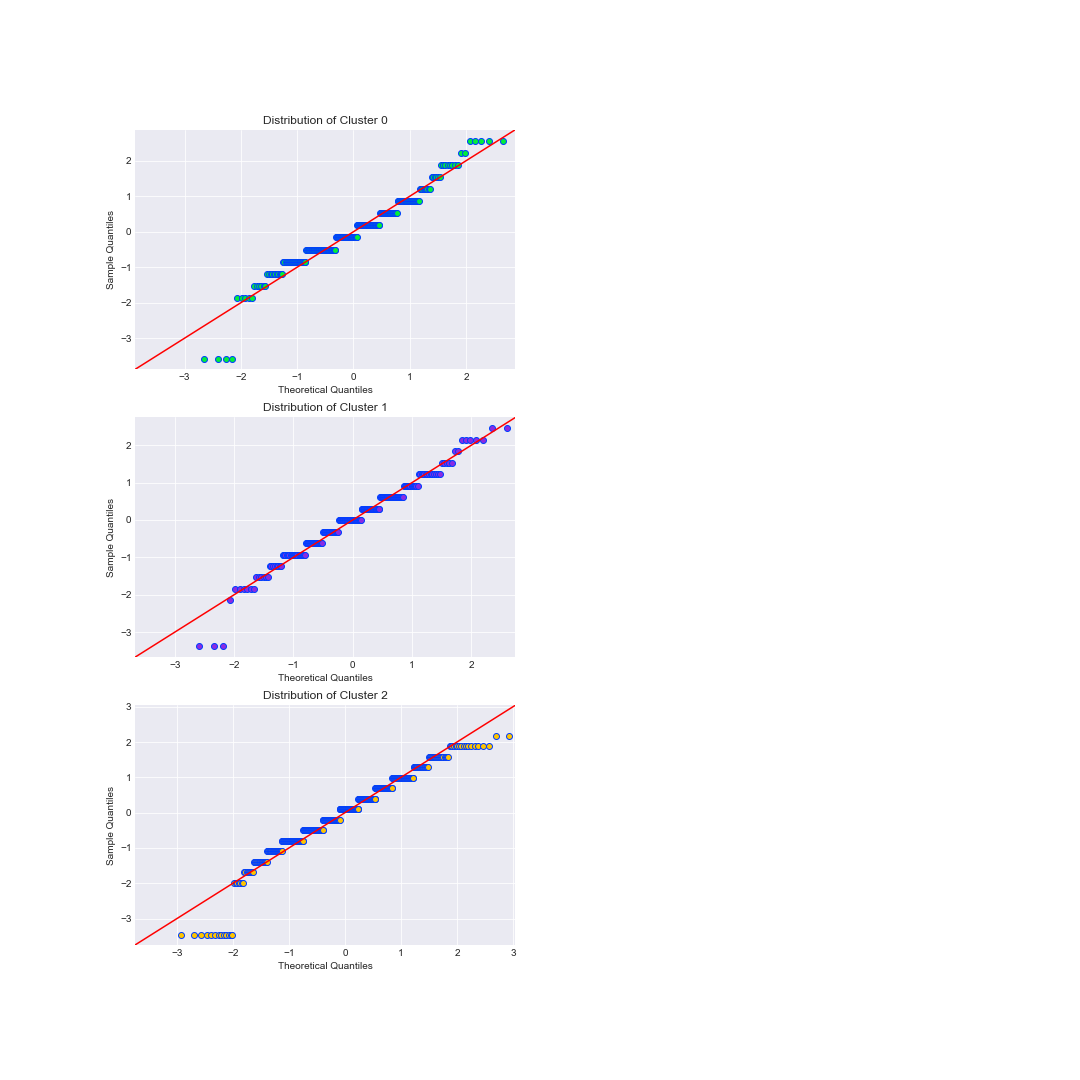

In [72]:
cluster0_qq = student_data[student_data["cluster"]==0]["G2"]
cluster1_qq = student_data[student_data["cluster"]==1]["G2"]
cluster2_qq = student_data[student_data["cluster"]==2]["G2"]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 2, 1)
sm.qqplot(cluster0_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C1')
ax.set_title('Distribution of Cluster 0')
ax = fig.add_subplot(3, 2, 3)
sm.qqplot(cluster1_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C3')
ax.set_title('Distribution of Cluster 1')
ax = fig.add_subplot(3, 2, 5)
sm.qqplot(cluster2_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C4')
ax.set_title('Distribution of Cluster 2')

plt.show()

The Q-Q plots compares the distribution of our data with the normal distribution. If the points fall approximately in the line, then the distribution might be normal. In our case, it seems that several points deviate from the line. Since that is the case, we can perform Shapiro Wilk test to ensure the normality of our data.

In [73]:
shapiro_G2 = student_data.groupby("cluster")["G2"].apply(lambda x: pd.Series(stats.shapiro(x), index=['Test Statistics','P-value']))
shapiro_G2

cluster                 
0        Test Statistics    9.537394e-01
         P-value            3.243484e-07
1        Test Statistics    9.758199e-01
         P-value            1.116810e-03
2        Test Statistics    9.519418e-01
         P-value            8.173747e-13
Name: G2, dtype: float64

With 95% confidence (alpha=0.05), we can reject the null hypothesis of Shapiro-Wilk test where it says the data that we have has normal distribution. Therefore, across the 3 clusters, the data is not normally distributed. Now we will do Levene's test to check for equal variance across the cluster.

In [74]:
groups = [student_data.loc[ids, 'G2'].values for ids in student_data.groupby('cluster').groups.values()]
stats.levene(*groups)

LeveneResult(statistic=2.8619369683123033, pvalue=0.05760778294066414)

With 95% confidence (alpha=0.05, p-value: 0.07), we can accept the null hypothesis of Levene test where it establish the equal variance of clusters. Since we have a non-normal distribution yet have equal variance data, we can only perform a non-parametric test called Kruskal-Wallis to determine if there are significant difference of grades across the cluster.


In [75]:
stats.kruskal(*groups)

KruskalResult(statistic=35.707522278317605, pvalue=1.7628284708740242e-08)

With 95% confidence (alpha=0.05, p-value: 1.76e-08), we can reject our null hypothesis.  This means that the three attributes affect the grades of students for the second trimester. Now we will perform a post-hoc analysis to determine which pair of cluster have significant difference.

In [76]:
post_hoc_values = sp.posthoc_dunn(student_data, val_col='G2', group_col='cluster', p_adjust='holm')
post_hoc_values

,0,1,2
0,1.000000e+00,0.021670,1.444676e-08
1,2.166978e-02,1.000000,9.792084e-03
2,1.444676e-08,0.009792,1.000000e+00


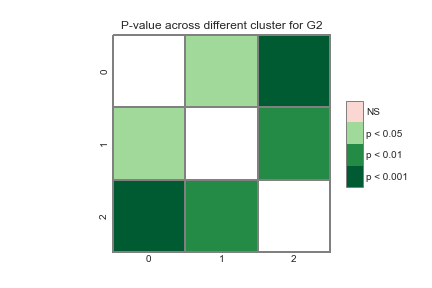

In [77]:
fig = plt.figure()
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
plt.title("P-value across different cluster for G2")
sp.sign_plot(post_hoc_values, **heatmap_args)
plt.show()

Across our post-hoc test (Dunn test), with 95% confidence (alpha=0.05), across all cluster there is a significant difference in terms of grades during the second trimester. We can look for the statistics in ranking of the grades per cluster to see why is it our post-hoc test shows such a result.

In [78]:
G2_MeanRank = student_data.groupby("cluster").agg({"G2_rank": ["describe"]})
G2_MeanRank

G2_rank                                                           
        describe                                                           
           count        mean         std   min    25%    50%    75%     max
cluster                                                                    
0          253.0  435.960474  275.277952  10.5  230.5  356.0  622.0  1027.5
1          210.0  500.259524  301.358508  10.5  230.5  489.5  744.0  1042.5
2          581.0  568.222892  301.053543  10.5  356.0  622.0  841.0  1042.5

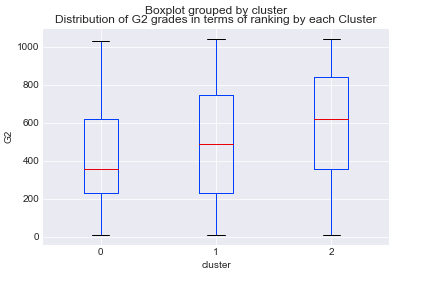

In [79]:
student_data.boxplot("G2_rank", by="cluster")
plt.title("Distribution of G2 grades in terms of ranking by each Cluster")
plt.xlabel("cluster")
plt.ylabel("G2")
plt.show()

When we look at the ranking of students (higher the rank, the better grades), we can see that cluster 3 students have the highest mean grades among the 3 cluster, followed by cluster 1, and lastly cluster 0. The difference in grades between cluster are shown to be have significant difference from one another by our statistical test (Kruskal-Walis and Dunn Test)

### G3 Grade Comparison between Clusters

We first do a exploration of the effect on G3 grades.

In [80]:
G3_df = student_data.groupby("cluster").agg({"G3": ["describe"]})
G3_df

G3                                                   
        describe                                                   
           count       mean       std  min   25%   50%    75%   max
cluster                                                            
0          253.0  10.573123  3.391105  0.0   9.0  11.0  12.00  18.0
1          210.0  10.990476  4.009547  0.0   9.0  11.0  13.75  19.0
2          581.0  11.803787  3.943924  0.0  10.0  12.0  14.00  20.0

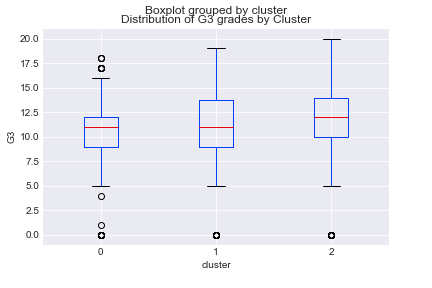

In [81]:
student_data.boxplot("G3", by="cluster")
plt.title("Distribution of G3 grades by Cluster")
plt.xlabel("cluster")
plt.ylabel("G3")
plt.show()

As shown above, there isn't any glaring difference of G3 grades between clusters. We can perform statistical analysis to check if significant difference that will show. But first let us, check if the data is normally distributed and have equal variance.

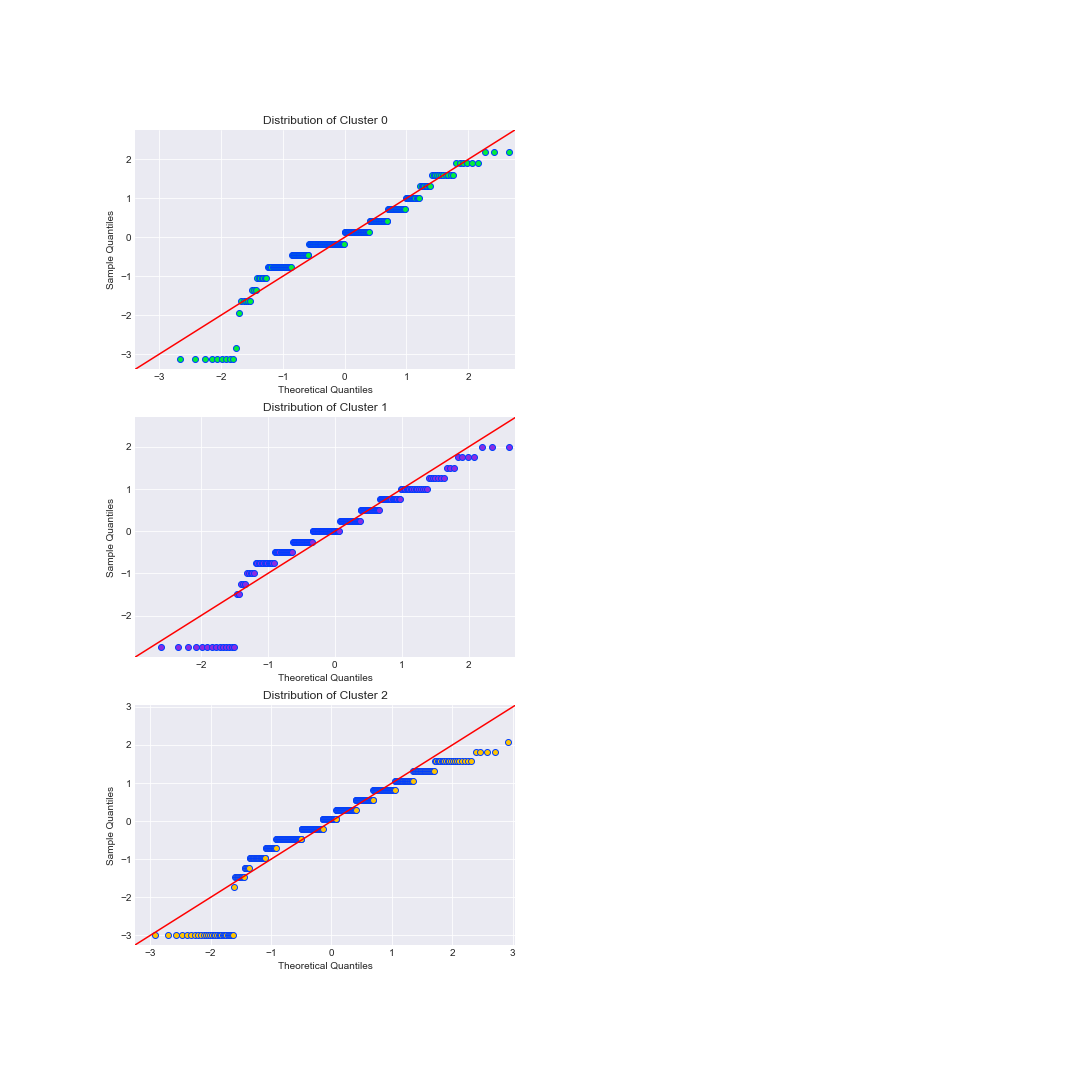

In [82]:
cluster0_qq = student_data[student_data["cluster"]==0]["G3"]
cluster1_qq = student_data[student_data["cluster"]==1]["G3"]
cluster2_qq = student_data[student_data["cluster"]==2]["G3"]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 2, 1)
sm.qqplot(cluster0_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C1')
ax.set_title('Distribution of Cluster 0')
ax = fig.add_subplot(3, 2, 3)
sm.qqplot(cluster1_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C3')
ax.set_title('Distribution of Cluster 1')
ax = fig.add_subplot(3, 2, 5)
sm.qqplot(cluster2_qq,line='45',fit=True,dist=stats.norm, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C4')
ax.set_title('Distribution of Cluster 2')

plt.show()

The Q-Q plots compares the distribution of our data with the normal distribution. If the points fall approximately in the line, then the distribution might be normal. In our case, it seems that several points deviate from the line. Since that is the case, we can perform Shapiro Wilk test to ensure the normality of our data.

In [83]:
shapiro_G3 = student_data.groupby("cluster")["G3"].apply(lambda x: pd.Series(stats.shapiro(x), index=['Test Statistics','P-value']))
shapiro_G3

cluster                 
0        Test Statistics    9.234102e-01
         P-value            3.878340e-10
1        Test Statistics    9.047425e-01
         P-value            2.491579e-10
2        Test Statistics    9.067563e-01
         P-value            2.227603e-18
Name: G3, dtype: float64

With 95% confidence (alpha=0.05), we can reject the null hypothesis of Shapiro-Wilk test where it says the data that we have has normal distribution. Therefore, across the 3 clusters, the data is not normally distributed. Now we will do Levene's test to check for equal variance across the cluster.

In [84]:
groups = [student_data.loc[ids, 'G3'].values for ids in student_data.groupby('cluster').groups.values()]
stats.levene(*groups)

LeveneResult(statistic=3.1045248633347233, pvalue=0.045261294526558006)

With 95% confidence (alpha=0.05, p-value: 0.02), we can reject the null hypothesis of Levene test where it establishes that there is no equal variance of clusters. Since we have a non-normal distribution and no equal variance data, we can only perform a non-parametric test called Kruskal-Wallis to determine if there are significant difference of grades across the cluster.


In [85]:
stats.kruskal(*groups)

KruskalResult(statistic=36.255270853237285, pvalue=1.3405035371013796e-08)

With 95% confidence (alpha=0.05, p-value: 1.3e-08), we can reject our null hypothesis.  This means that the three attributes affect the grades of students for the last trimester. Now we will perform a post-hoc analysis to determine which pair of cluster have significant difference.

In [86]:
post_hoc_values = sp.posthoc_dunn(student_data, val_col='G3', group_col='cluster', p_adjust='holm')
post_hoc_values

,0,1,2
0,1.000000e+00,0.021766,1.131367e-08
1,2.176559e-02,1.000000,8.644641e-03
2,1.131367e-08,0.008645,1.000000e+00


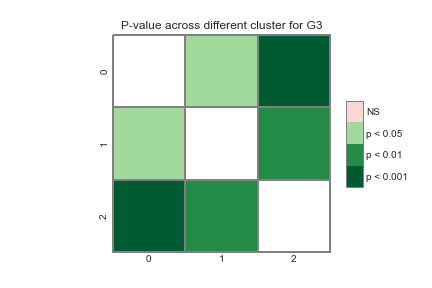

In [87]:
fig = plt.figure()
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
plt.title("P-value across different cluster for G3")
sp.sign_plot(post_hoc_values, **heatmap_args)
plt.show()

Across our post-hoc test (Dunn test), with 95% confidence (alpha=0.05), across all cluster there is a significant difference in terms of grades during the last trimester. We can look for the statistics in rank of the grades per cluster to see why is it our post-hoc test shows such a result.

In [88]:
G2_MeanRank = student_data.groupby("cluster").agg({"G3_rank": ["describe"]})
G2_MeanRank

G3_rank                                                             
        describe                                                             
           count        mean         std   min    25%    50%      75%     max
cluster                                                                      
0          253.0  435.466403  274.343422  27.0  199.0  459.0  586.000  1023.0
1          210.0  499.714286  296.784271  27.0  199.0  459.0  770.125  1040.0
2          581.0  568.635112  302.880078  27.0  307.0  586.0  795.500  1044.0

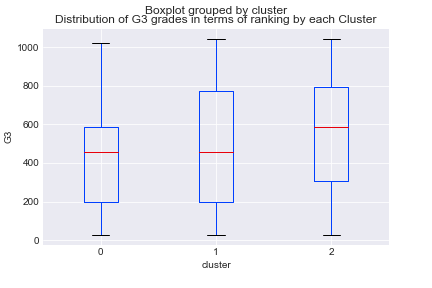

In [89]:
student_data.boxplot("G3_rank", by="cluster")
plt.title("Distribution of G3 grades in terms of ranking by each Cluster")
plt.xlabel("cluster")
plt.ylabel("G3")
plt.show()

When we look at the ranking of students (higher the rank, the better grades), we can see that cluster 3 students have the highest mean grades among the 3 cluster, followed by cluster 1, and lastly cluster 0. The difference in grades between cluster are shown to be have significant difference from one another by our statistical test (Kruskal-Walis and Dunn Test)

# Insights and Conclusions 

The generated results from the data modelling and statistical inference answer the research question of the study: ***Can the grades of students be classified based on their quality of family relationships, alcohol consumption, and absences?***

Given that there is a significant difference in grades of students between clusters for each grading period at a confidence level of 95%, the null hypothesis is rejected. Therefore, the grades of students have a difference between clusters based on their quality of family relationships, alcohol consumption, and absences. This means that the grades of students were dependent on the characteristics of the clusters. 

***p-values of the Statistical Test***
- **G1**: p = 1.08 x 10^-08
- **G2**: p = 1.76 x 10^-08
- **G3**: P = 1.34 x 10^-08


The mentioned results of the statistical test prove that the grades of the students can be classified based on their alcohol consumption, family relationship, and absences. Based on the resulting clusters from the data modelling performed, it can be deduced that students with good family relationships, moderate alcohol consumption, and most frequent absences tend to have the lowest grade compared with the other clusters (Cluster 0). Meanwhile,  students with the worst family relationships, low alcohol consumption, and frequent absences are likely to have an average grade compared with the other clusters (Cluster 1). Lastly, students with the best family relationships, lowest alcohol consumption, and occasional absences are likely to have the highest grade compared with the other clusters (Cluster 2). 

Overall, this indicates that family relationships, alcohol consumption, and number of absences can affect student grades. This then answers the formulated research question, because it is proven that grades can indeed be classified in accordance to the three attributes.

# Authors:

Group 15 (S13)
- John Wesley Abe
- Hannah Regine Fong
- Alessandra Pauleen Gomez